![](https://stimg.cardekho.com/pwa/img/CarDekho-Logo.svg)

# Introduction to Linear Regression: Buying the Right Car 🚗


Data source: [CarDekho](https://www.cardekho.com/) (has information on a wide variety of cars including their price)

Overall Goal: Use the data above to calculate a good deal on a new car.(exact price to pay for a specific type of car)

Type of Machine Learning to use: Linear Regression


## Fetching the Data




Read datafile (cardata.csv) using pandas, and store under the variable car_data.  


In [2]:
import pandas as pd
import os
import gdown
gdown.download('https://drive.google.com/uc?id=1nDjHLBMBZ3THSck1Ah3XyhgtRHIBT2Ec', 'dekho.csv', True)

'dekho.csv'

In [3]:
# read data in using 'pd.read_csv('file')'
import pandas as pd
data_path  = 'dekho.csv'
car_data = pd.read_csv(data_path)

##Exploring the Data  




Each row corresponds to a specific car on sale and each column details information about that car


In [4]:
car_data.head()

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission
0,ritz,5,3.35,27000,Petrol,Dealer,Manual
1,sx4,6,4.75,43000,Diesel,Dealer,Manual
2,ciaz,2,7.25,6900,Petrol,Dealer,Manual
3,wagon r,8,2.85,5200,Petrol,Dealer,Manual
4,swift,5,4.60,42450,Diesel,Dealer,Manual


**(Selling price is in lakhs)**

### Columns in the data table:

* Car_Name: This column should be filled with the name of the car.

* Age: This column should be filled with the number of years since the car was made.

* Selling_Price: This column should be filled with the price the owner wants to sell the car at.

* Kms_Driven: This is the distance completed by the car in km.

* Fuel_Type: Fuel type of the car.

* Seller_Type: Defines whether the seller is a dealer or an individual.

* Transmission: Defines whether the car is manual or automatic.



Next: Selecting columns in data table to inspect them more closely

In [5]:
car_data[['Car_Name']].head()

,Car_Name
0,ritz
1,sx4
2,ciaz
3,wagon r
4,swift


In [6]:
car_data[['Fuel_Type']].head()


,Fuel_Type
0,Petrol
1,Diesel
2,Petrol
3,Petrol
4,Diesel


###  Size of data set


In [7]:
print(len(car_data))

301


##  **Visualizing the Data**


Scatter plot: one way of looking at the data

Example: looking at `selling price` vs. `age`

<Axes: xlabel='Age', ylabel='Selling_Price'>

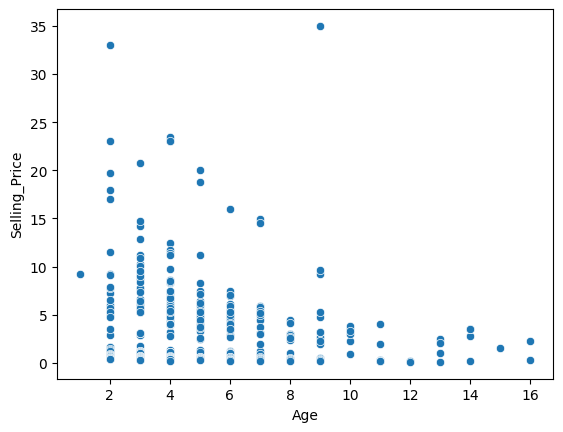

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x = 'Age', y = 'Selling_Price', data = car_data)

### Visualizing Categorical Data


`Transmission` can either be `Manual`or `Automatic`, not  a number (categorical variable)



###2

Counting umber of `Petrol` vs. `Diesel` vs. `CNG` cars in the dataset

In [10]:
car_data.groupby('Fuel_Type').count()

,Car_Name,Age,Selling_Price,Kms_Driven,Seller_Type,Transmission
Fuel_Type,,,,,,
CNG,2,2,2,2,2,2
Diesel,60,60,60,60,60,60
Petrol,239,239,239,239,239,239


Using `catplot` for visualizing categorical variables

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 31.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


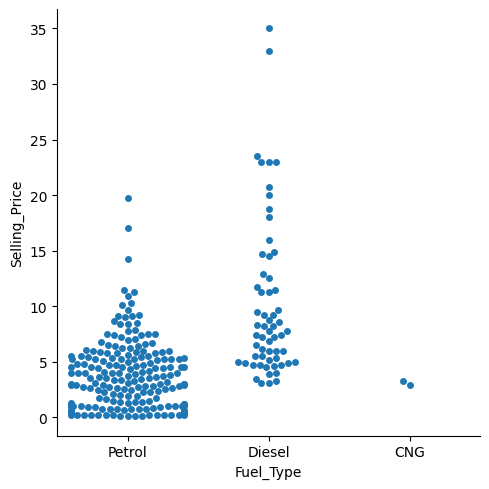

In [11]:
sns.catplot(x = 'Fuel_Type', y = 'Selling_Price', data = car_data, kind = 'swarm')

###  3




How price varies with Kms_Driven


<Axes: xlabel='Kms_Driven', ylabel='Selling_Price'>

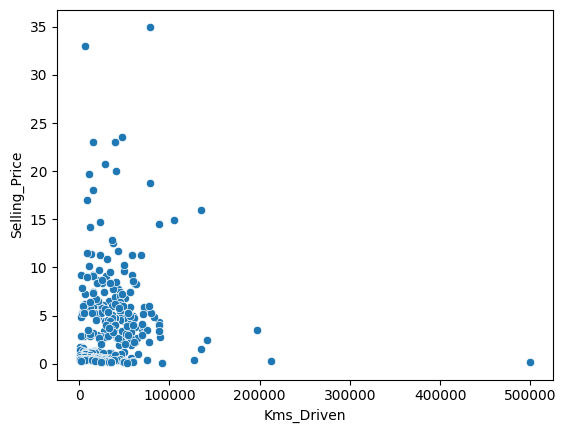

In [9]:
sns.scatterplot(x = 'Kms_Driven', y= 'Selling_Price', data = car_data)

### 4
For `Seller_Type` and `Transmission`, do we expect a car to be more or less expensive?

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 44.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


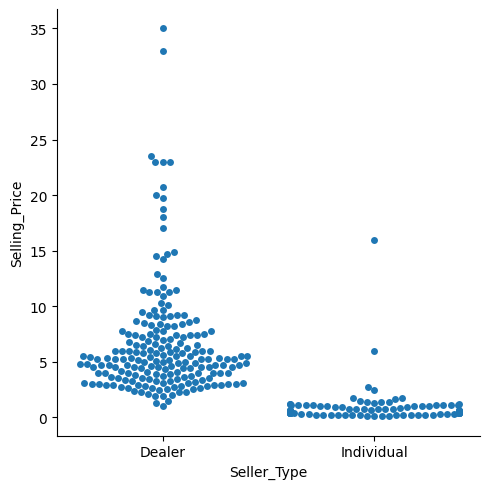

In [ ]:
sns.catplot(x = 'Seller_Type', y = 'Selling_Price', data = car_data, kind = 'swarm')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


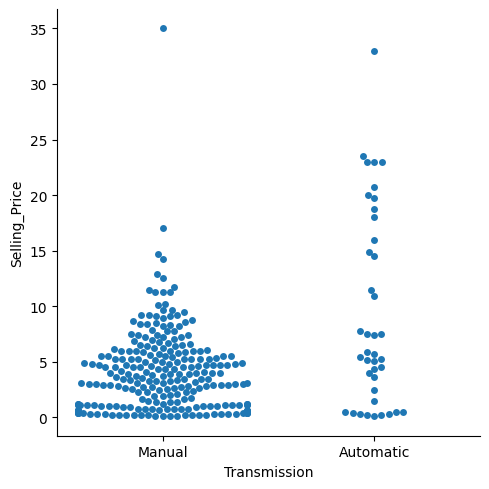

In [ ]:
sns.catplot(x = 'Transmission', y = 'Selling_Price', data = car_data, kind = 'swarm')

## Quantifying the relationship between age and selling price


### Linear Regression

Linear regression: statistical approach to find and determine a relationship among an independent variable `x` and a dependent variable `y`

Here:

`x` = `Age`

`y` = `Selling_Price`

linear regression : helps find the `m` and `b` that best relates the variables

$y= mx + b$

### Linear Regression in Python

Use sklearn to run linear regression

In [12]:
from sklearn import linear_model
import numpy as np

x = car_data['Age'].values
#add dimension using np.newaxis
x = x[:,np.newaxis]
y = car_data['Selling_Price'].values

# set up our model
linear = linear_model.LinearRegression(fit_intercept = True)

# train the model
linear.fit(x, y)

LinearRegression()

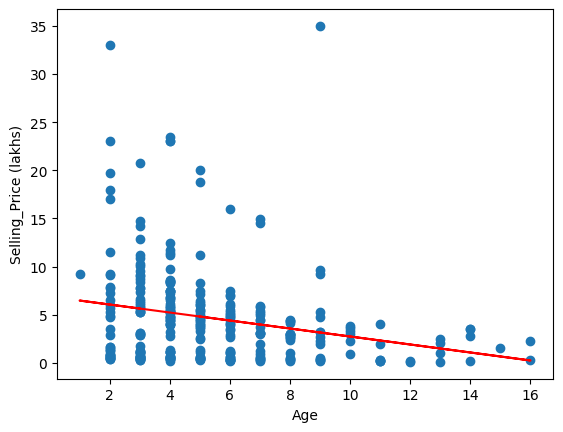

In [28]:
#Visualize the fit
import matplotlib.pyplot as plt


x_plot = car_data['Age'].values
x_plot = x_plot[:,np.newaxis]

y_pred = linear.predict(x_plot)
plt.plot(x_plot, y_pred, color='red')

plt.scatter(x_plot, y)
plt.xlabel('Age') # set the labels of the x and y axes
plt.ylabel('Selling_Price (lakhs)')
plt.show()

aim: to find the best `b` and `m` to capture our data's story

grab this from trained model

In [29]:
linear.coef_

array([-0.41509169])

In [30]:
print('Our m is %0.2f lakhs/year'%linear.coef_)

Our m is -0.42 lakhs/year


`m`: The more recent a car is by one year, the selling price is `m` lakhs higher.

### 5

How much cheaper is an older car with this model?

We need intercept `b`

In [ ]:
print('Our b is %0.2f lakhs'%linear.intercept_)

Our b is 6.89 lakhs


### 6

If car is 2015 model and salesman offers to sell it for 7 lakh, Would you take it?

If not, how much would you take it for?

In [31]:
x = 5
y = -0.42*x + 6.89
print(y)

4.789999999999999


### Multiple Linear Regression: Using multiple inputs

Making better model by using multiple input variables, like `Kms_Driven` and `Transmission`

`Transmission` is a categorical variable

Change to a numeric variable by replacing `Manual` with `1` and `Automatic` with `0`.

In [32]:
car_data['TransmissionNumber'] = car_data['Transmission'].replace({'Manual':1, 'Automatic':0})

Run multiple linear regression on the dataset

In [39]:
x = car_data[['Age', 'TransmissionNumber', 'Kms_Driven']].values

# set up our model
multiple = linear_model.LinearRegression(fit_intercept = True)
target_variable = car_data['Selling_Price'].values

# train the model
multiple.fit(x, target_variable)

LinearRegression()

Compare this with previous simple linear regression model using their r-squared ($R^2$).

In [34]:
print('Our single linear model had an R^2 of: %0.3f'%linear.score(x[:,[0]], target_variable))

Our single linear model had an R^2 of: 0.056


In [35]:
print('Our multiple linear model had an R^2 of: %0.3f'%multiple.score(x, target_variable))

Our multiple linear model had an R^2 of: 0.203


In real life: you wouldn't buy a car based on a single variable like `Age`. You would take into account a lot of different variables like the multiple linear model

### 7

Building a model with `Seller_Type` included

In [36]:
x = car_data['Age'].values
print(x.shape)

(301,)


In [38]:
car_data['SellerNumber'] = car_data['Seller_Type'].replace({'Dealer':1, 'Individual':0})

x = car_data[['Age', 'SellerNumber', 'Kms_Driven', 'TransmissionNumber']].values
print(x.shape)

(301, 4)


### 8

Compare each car's predicted price to its actual one to see which cars are a good deal, and which are overpriced.

First Step: make a scatterplot of predicted vs. real prices using pyplot methods

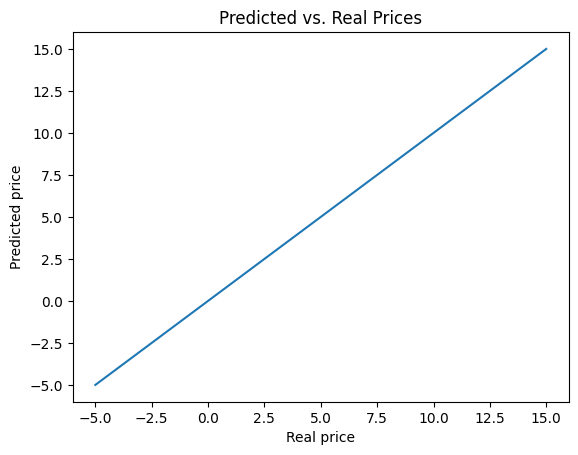

In [40]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
plt.show()

No matter what our R^2 says, linear regression might not be the best model for this situation.

A more complex model could make more accurate predictions.


Next: add predicted prices on to the data frame



In [41]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

features = ['Age', 'TransmissionNumber', 'Kms_Driven']
target_variable = car_data['Selling_Price'].values
multiple.fit(car_data[features], target_variable)
predictions = multiple.predict(car_data[features])

car_data['Prediction'] = predictions

print(car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    4.001490
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    3.742513
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    5.265912
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    2.004954
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    4.271445
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...
296     city    3           9.50       33988    Diesel      Dealer       Manual                   1             1    5

**Next step:** figure out the cars that are especially good or bad deals by comparing the real price to the predicted price


**Calculate "Deal Score":**

High deal score = low true cost compared to its predicted value

Low Deal Score = overpriced

In [42]:
car_data['deal_score'] = (car_data['Prediction'] - car_data['Selling_Price']) / car_data['Selling_Price'] * 100  #your way of calculating the score here

print(car_data)

    Car_Name  Age  Selling_Price  Kms_Driven Fuel_Type Seller_Type Transmission  TransmissionNumber  SellerNumber  Prediction  deal_score
0       ritz    5           3.35       27000    Petrol      Dealer       Manual                   1             1    4.001490   19.447448
1        sx4    6           4.75       43000    Diesel      Dealer       Manual                   1             1    3.742513  -21.210257
2       ciaz    2           7.25        6900    Petrol      Dealer       Manual                   1             1    5.265912  -27.366727
3    wagon r    8           2.85        5200    Petrol      Dealer       Manual                   1             1    2.004954  -29.650736
4      swift    5           4.60       42450    Diesel      Dealer       Manual                   1             1    4.271445   -7.142497
..       ...  ...            ...         ...       ...         ...          ...                 ...           ...         ...         ...
296     city    3           9.50  

Using the pandas sort_values function, identify the 10 most overpriced cars and the 10 cars that are the best deal.

In [49]:
### YOUR CODE HERE
car_data.sort_values("deal_score", ascending = True).head(10)

### END CODE

,Car_Name,Age,Selling_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,TransmissionNumber,SellerNumber,Prediction,deal_score
189,Hero Super Splendor,14,0.20,55000,Petrol,Individual,Manual,1,0,-0.356152,-278.076048
39,sx4,16,2.25,62000,Petrol,Dealer,Manual,1,1,-1.310927,-158.263418
37,800,16,0.35,127000,Petrol,Individual,Manual,1,0,-0.175191,-150.054625
92,innova,14,3.51,75000,Petrol,Dealer,Manual,1,1,-0.006695,-100.190739
281,city,13,2.10,50456,Petrol,Dealer,Manual,1,1,0.102994,-95.095541
86,land cruiser,9,35.00,78000,Diesel,Dealer,Manual,1,1,2.738436,-92.175898
54,innova,14,2.75,90000,Petrol,Individual,Manual,1,0,0.255398,-90.712804
99,fortuner,9,9.65,50024,Diesel,Dealer,Manual,1,1,2.249615,-76.687928
67,fortuner,9,9.25,59000,Diesel,Dealer,Manual,1,1,2.406451,-73.984310
97,corolla altis,2,17.00,8700,Petrol,Dealer,Manual,1,1,5.297363,-68.839039


Plotting the best deals in one color, the most overpriced cars in another color

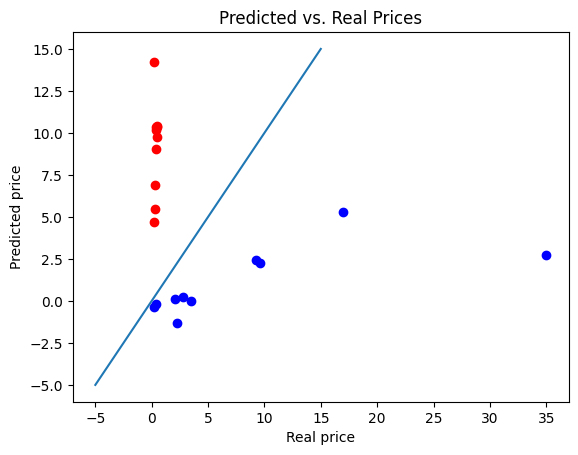

In [54]:
plt.plot([-5,15],[-5,15]) #Drawing in the line of equality so we can compare
plt.title("Predicted vs. Real Prices")
plt.xlabel("Real price")
plt.ylabel("Predicted price")
#Make a scatterplot with several colors:
#Show 10 best deals in one color
#Show 10 most overpriced in another color
#Show the other cars in a third color

top_best = car_data.sort_values("deal_score", ascending = False).head(10)
top_overpriced = car_data.sort_values("deal_score", ascending = True).head(10)
plt.scatter(top_best['Selling_Price'], top_best['Prediction'], color = 'red', label = 'best deals')

plt.scatter(top_overpriced['Selling_Price'], top_overpriced['Prediction'], color = 'blue', label = 'overpriced')

plt.show()